# Import libraries

In [1]:
from sklearn import tree
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Import Data

In [2]:
red_df = pd.read_csv("Data/winequality-red.csv", delimiter=",")
white_df = pd.read_csv("Data/winequality-white.csv", delimiter=",")  

In [3]:
red_df.head()
#red_df['quality'].value_counts()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
white_df.head()
#white_df['quality'].value_counts()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


# Train Test Split

In [5]:
red_X = red_df.drop(columns = "quality")
white_X = white_df.drop(columns = "quality")

In [6]:
red_y = red_df["quality"]
white_y = white_df["quality"]

In [7]:
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(red_X, red_y, stratify=red_y, random_state=42)
X_train_white, X_test_white, y_train_white, y_test_white = train_test_split(white_X, white_y, stratify=white_y, random_state=42)

In [8]:
number_list = np.array(y_train_white)
(unique, counts) = np.unique(number_list, return_counts=True)
frequencies = np.asarray((unique, counts)).T
frequencies

array([[   3,   15],
       [   4,  122],
       [   5, 1093],
       [   6, 1648],
       [   7,  660],
       [   8,  131],
       [   9,    4]], dtype=int64)

In [9]:
number_list = np.array(y_test_white)
(unique, counts) = np.unique(number_list, return_counts=True)
frequencies = np.asarray((unique, counts)).T
frequencies

array([[  3,   5],
       [  4,  41],
       [  5, 364],
       [  6, 550],
       [  7, 220],
       [  8,  44],
       [  9,   1]], dtype=int64)

# Decision Tree Model

In [10]:
# Red wine
red_clf = DecisionTreeClassifier()
red_clf = red_clf.fit(X_train_red, y_train_red)
red_clf.score(X_train_red, y_train_red)

1.0

In [11]:
red_clf.score(X_test_red, y_test_red)

0.6075

In [12]:
# White wine
white_clf = DecisionTreeClassifier()
white_clf = white_clf.fit(X_train_white, y_train_white)
white_clf.score(X_train_white, y_train_white)

1.0

In [13]:
white_clf.score(X_test_white, y_test_white)

0.6008163265306122

# Print Text Representation

In [14]:
# Red wine
text_representation = tree.export_text(red_clf)
print(text_representation)

|--- feature_10 <= 10.15
|   |--- feature_9 <= 0.57
|   |   |--- feature_10 <= 9.08
|   |   |   |--- feature_0 <= 8.15
|   |   |   |   |--- feature_1 <= 0.60
|   |   |   |   |   |--- class: 4
|   |   |   |   |--- feature_1 >  0.60
|   |   |   |   |   |--- class: 5
|   |   |   |--- feature_0 >  8.15
|   |   |   |   |--- feature_2 <= 0.55
|   |   |   |   |   |--- class: 6
|   |   |   |   |--- feature_2 >  0.55
|   |   |   |   |   |--- feature_5 <= 12.50
|   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |--- feature_5 >  12.50
|   |   |   |   |   |   |--- class: 5
|   |   |--- feature_10 >  9.08
|   |   |   |--- feature_10 <= 9.53
|   |   |   |   |--- feature_8 <= 3.56
|   |   |   |   |   |--- feature_8 <= 3.22
|   |   |   |   |   |   |--- class: 5
|   |   |   |   |   |--- feature_8 >  3.22
|   |   |   |   |   |   |--- feature_7 <= 1.00
|   |   |   |   |   |   |   |--- feature_7 <= 1.00
|   |   |   |   |   |   |   |   |--- feature_3 <= 2.25
|   |   |   |   |   |   |   |   |   |---

In [15]:
# White wine
text_representation = tree.export_text(white_clf)
print(text_representation)

|--- feature_10 <= 10.85
|   |--- feature_1 <= 0.24
|   |   |--- feature_9 <= 0.47
|   |   |   |--- feature_0 <= 6.55
|   |   |   |   |--- feature_10 <= 10.55
|   |   |   |   |   |--- feature_10 <= 9.85
|   |   |   |   |   |   |--- feature_8 <= 3.25
|   |   |   |   |   |   |   |--- feature_3 <= 10.35
|   |   |   |   |   |   |   |   |--- feature_3 <= 1.55
|   |   |   |   |   |   |   |   |   |--- class: 6
|   |   |   |   |   |   |   |   |--- feature_3 >  1.55
|   |   |   |   |   |   |   |   |   |--- feature_9 <= 0.39
|   |   |   |   |   |   |   |   |   |   |--- feature_1 <= 0.23
|   |   |   |   |   |   |   |   |   |   |   |--- class: 6
|   |   |   |   |   |   |   |   |   |   |--- feature_1 >  0.23
|   |   |   |   |   |   |   |   |   |   |   |--- class: 5
|   |   |   |   |   |   |   |   |   |--- feature_9 >  0.39
|   |   |   |   |   |   |   |   |   |   |--- class: 5
|   |   |   |   |   |   |   |--- feature_3 >  10.35
|   |   |   |   |   |   |   |   |--- feature_9 <= 0.35
|   |   |   |   |

# Plot the Trees

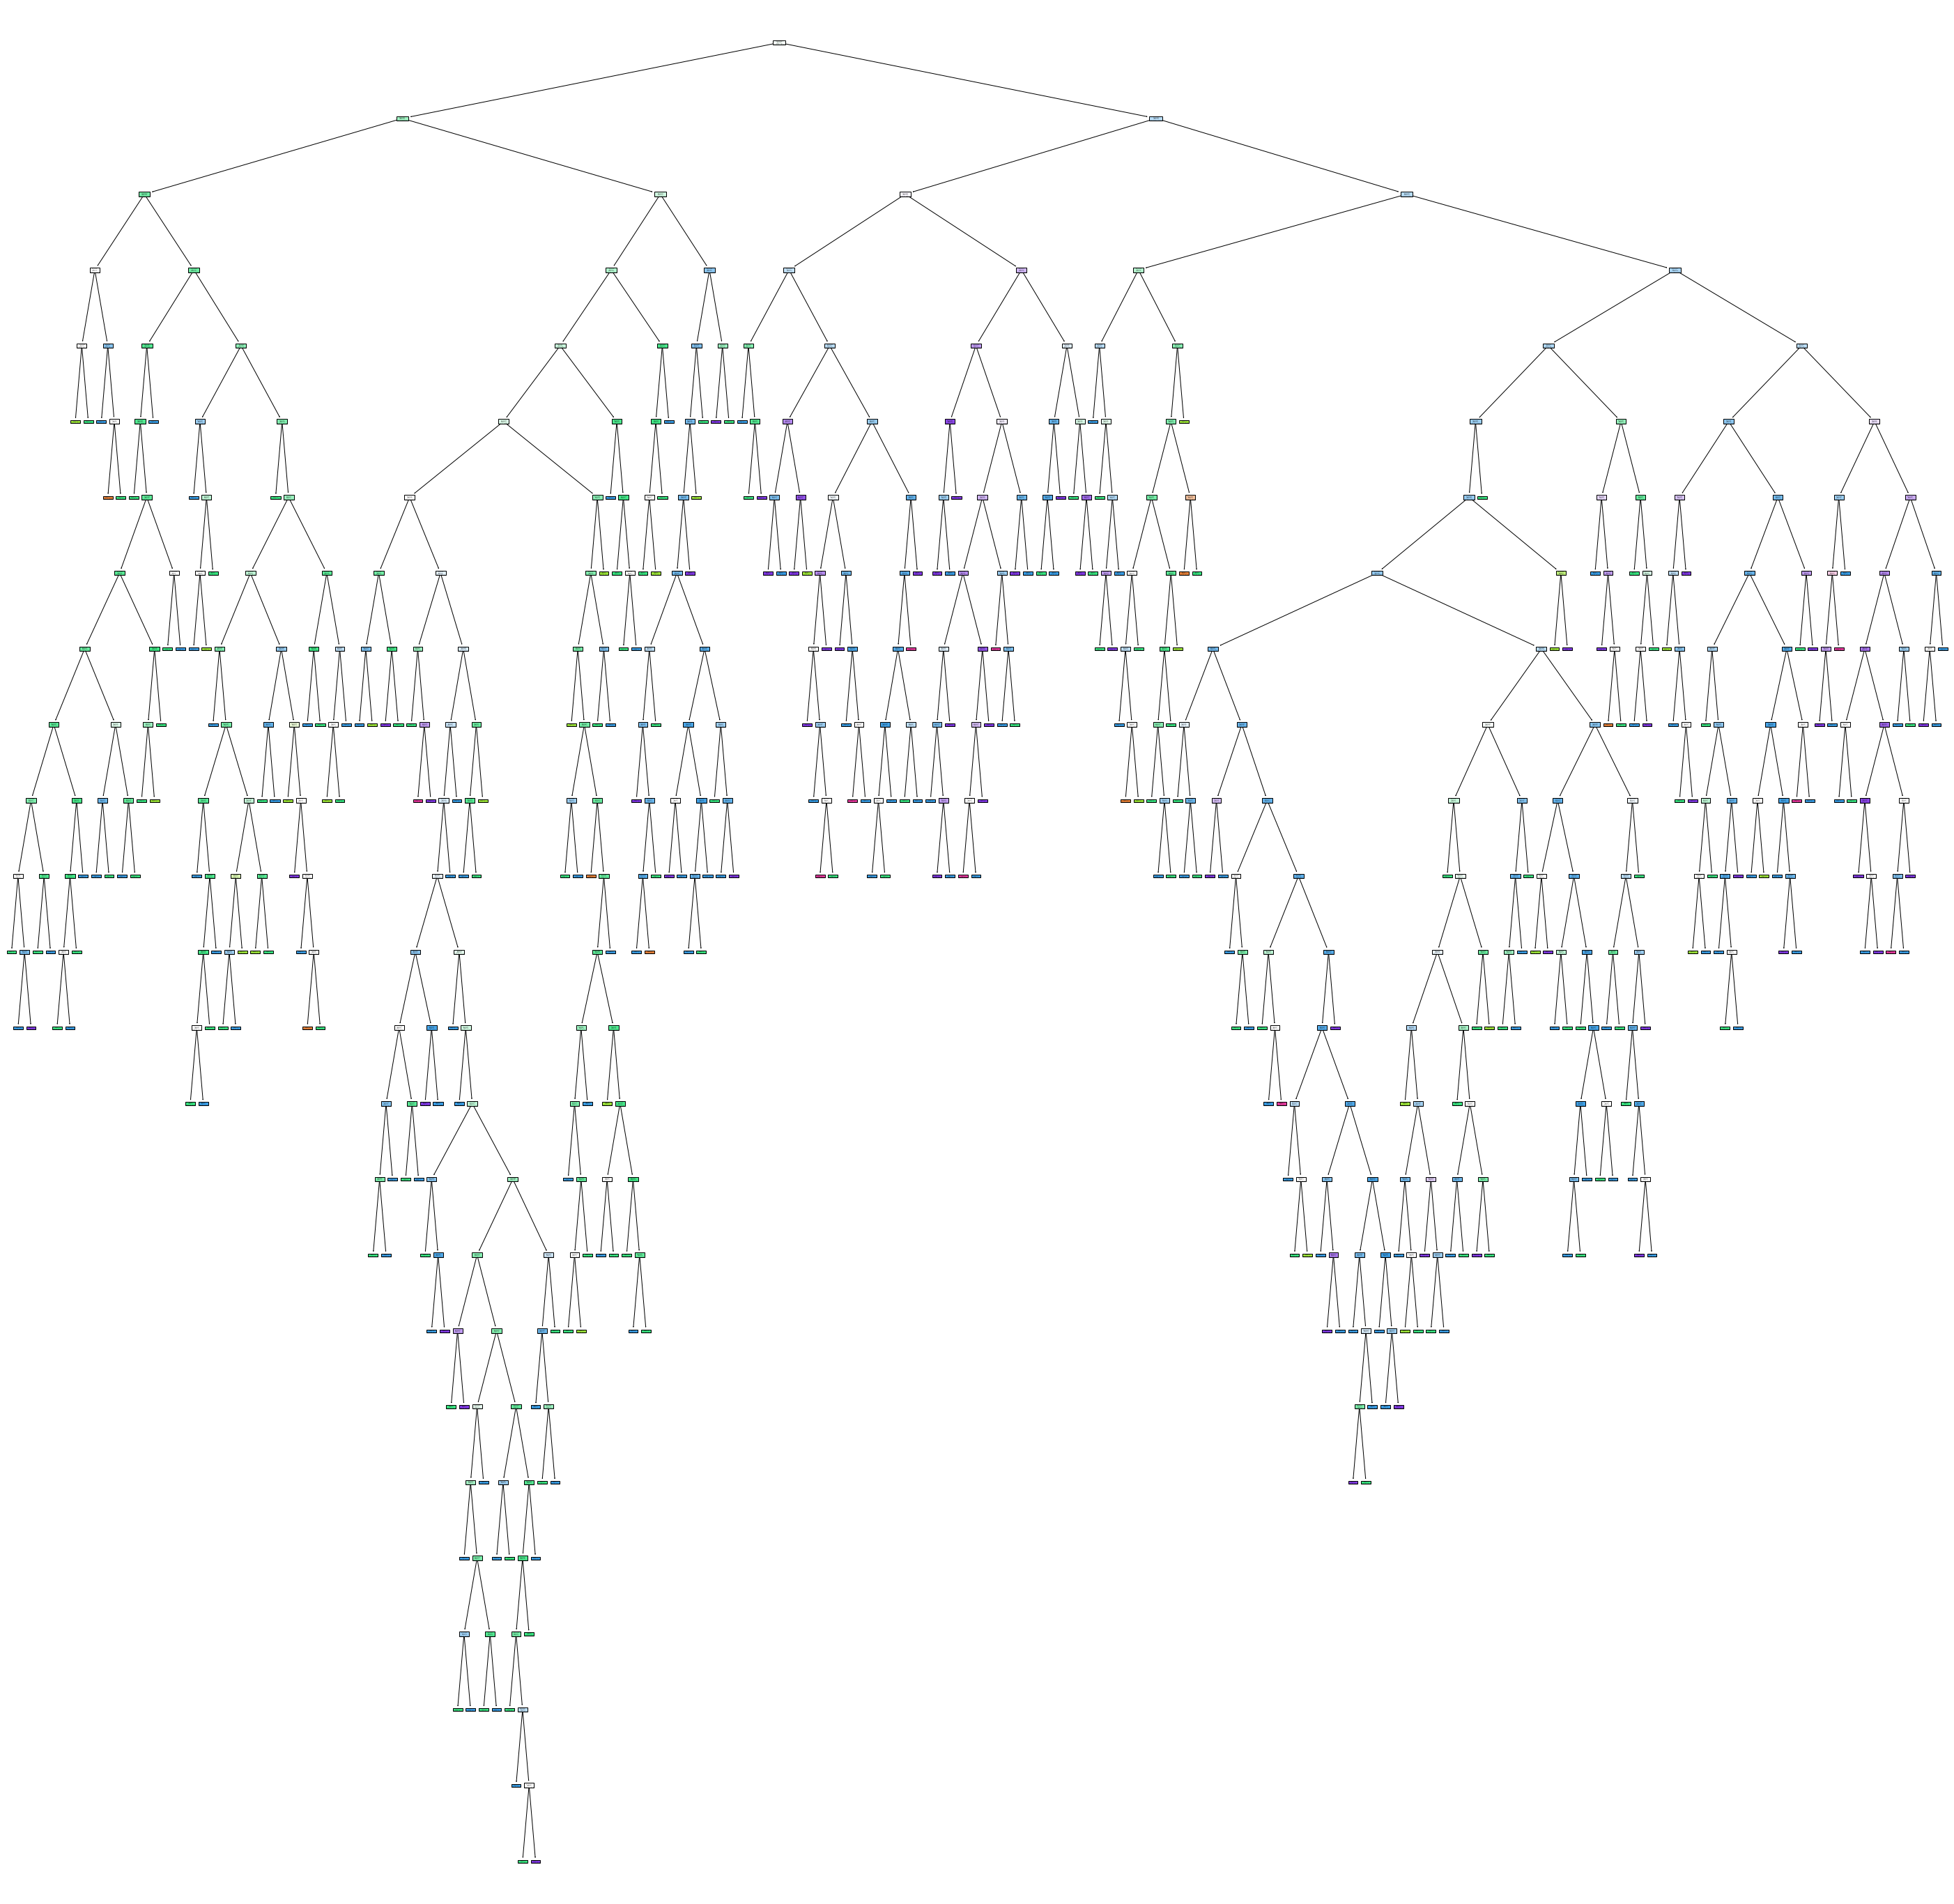

In [20]:
# Red wine
fig = plt.figure(figsize=(50, 50))
tree.plot_tree(red_clf, filled=True)
#plt.savefig('red_decision_tree.png', dpi=250)
plt.show()

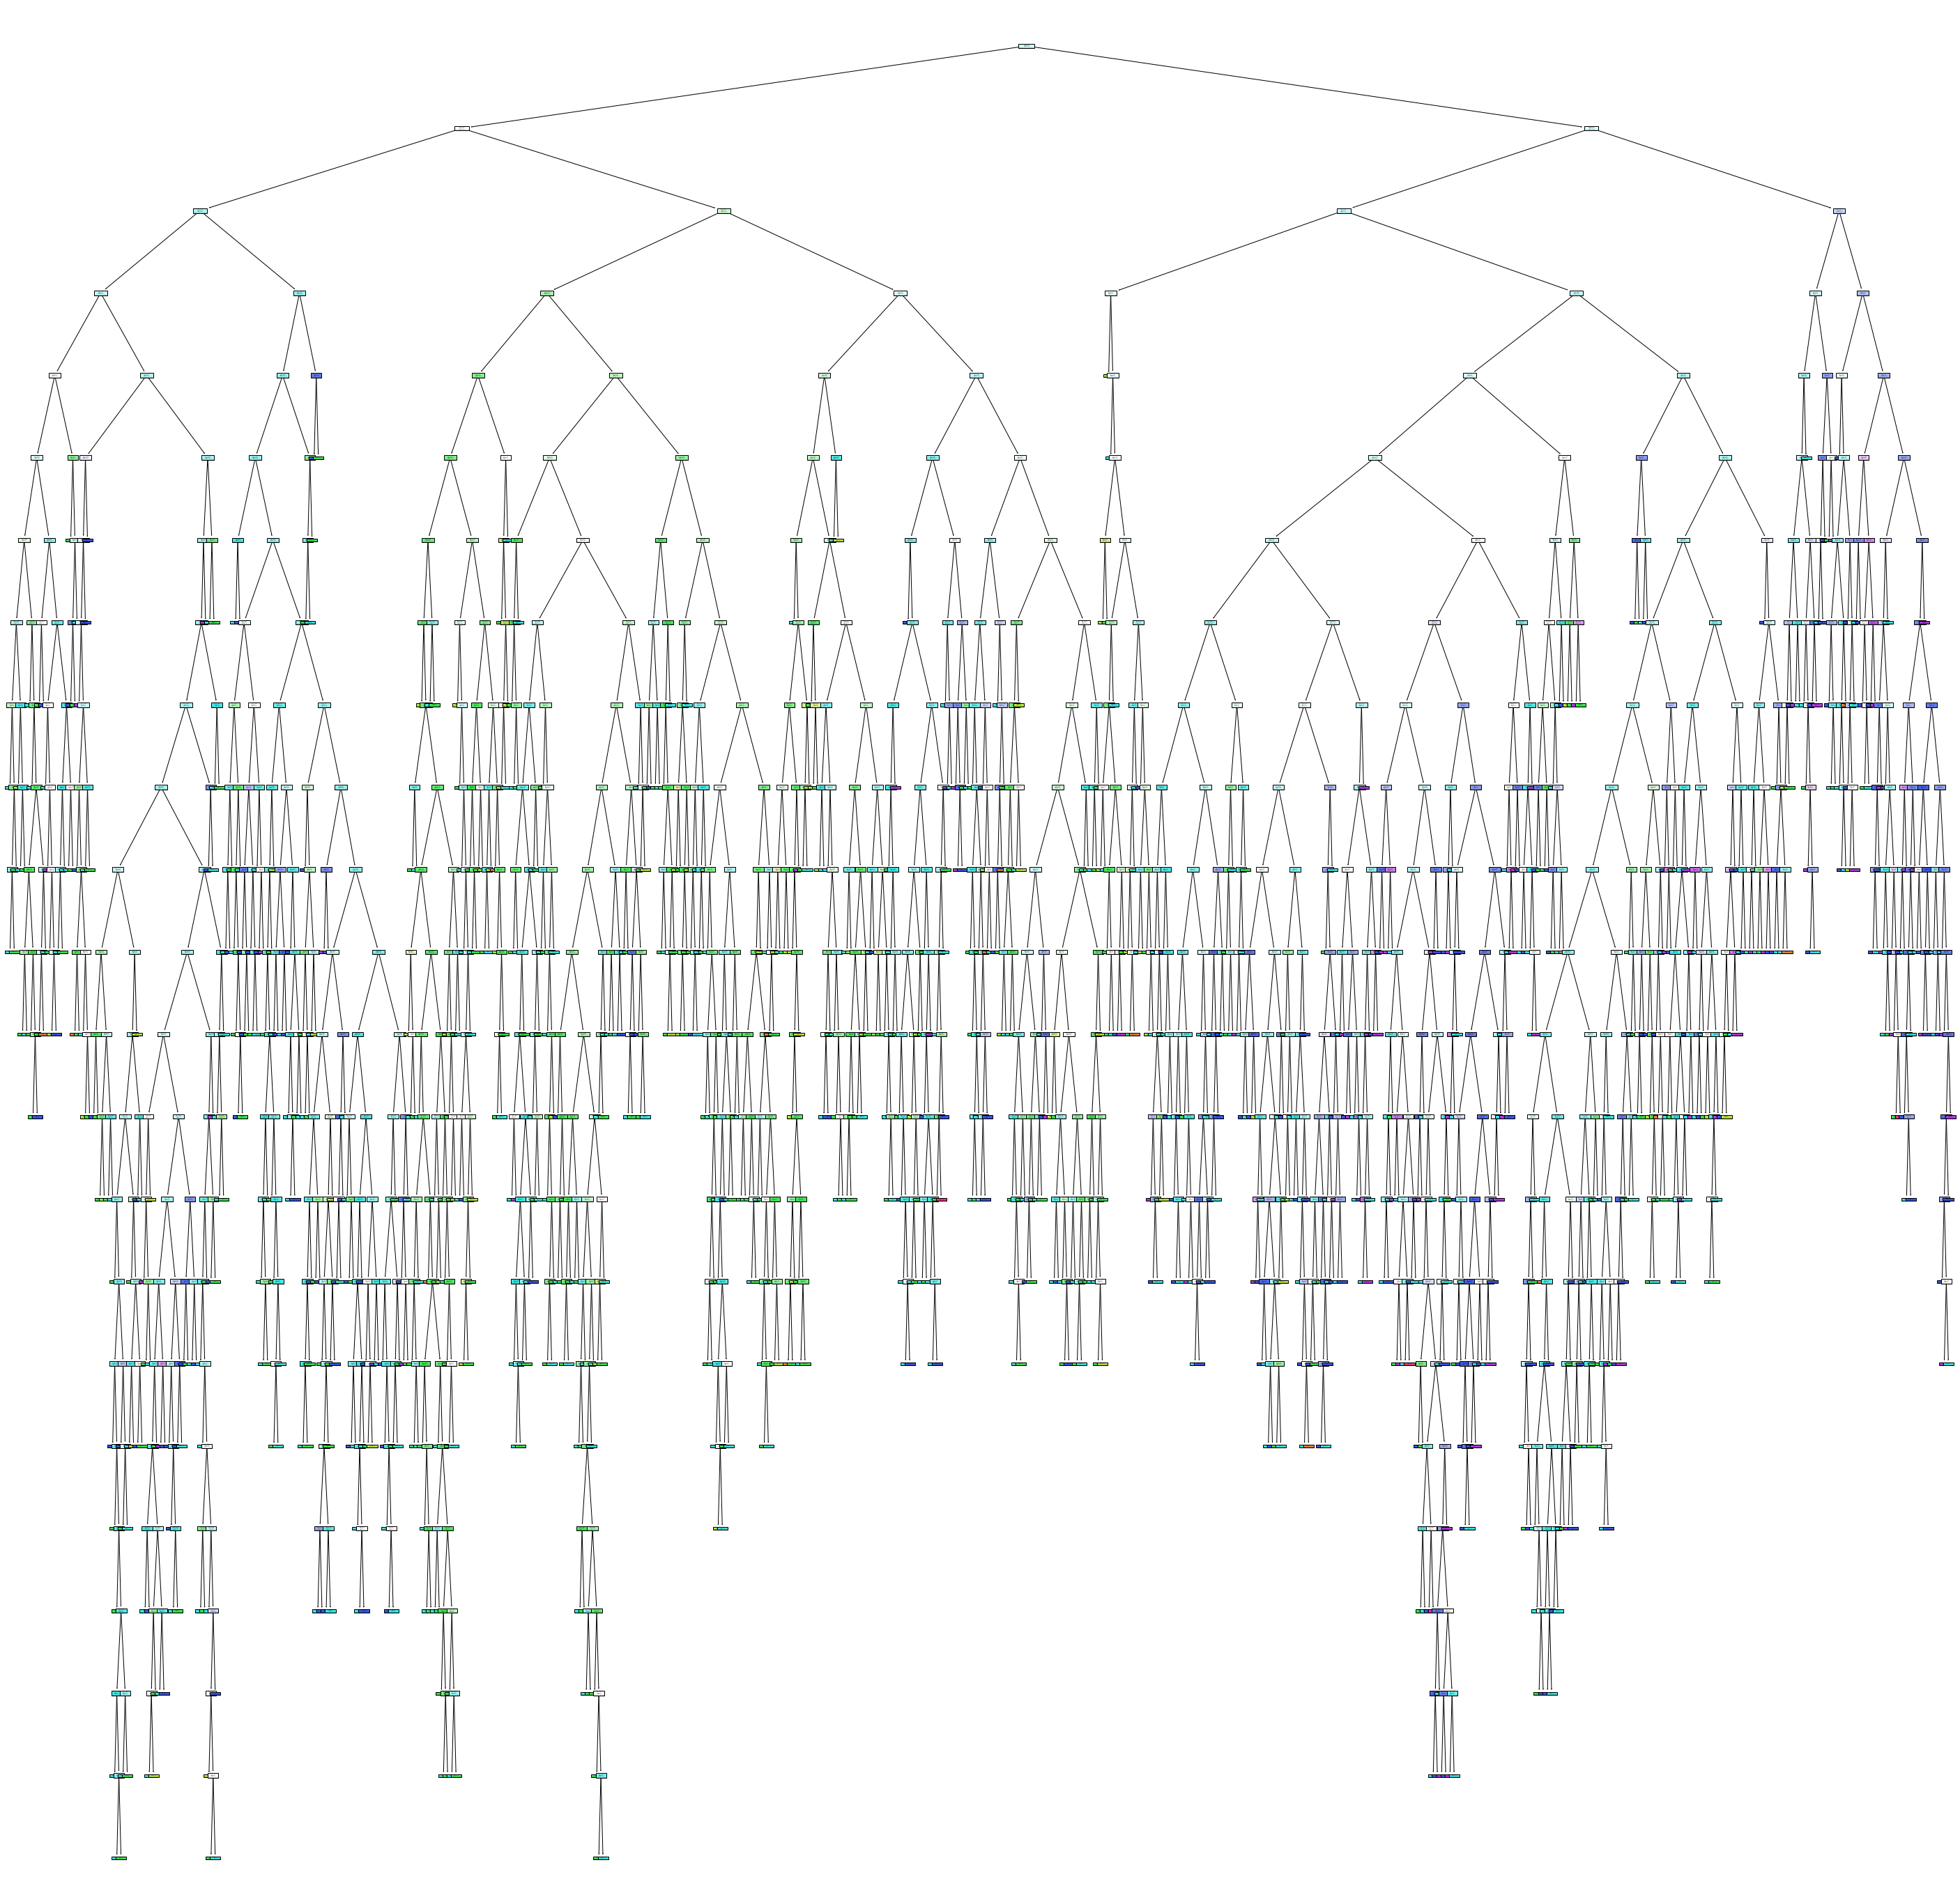

In [26]:
# White wine
fig = plt.figure(figsize=(50, 50))
tree.plot_tree(white_clf, filled=True)
#plt.savefig('white_decision_tree.png', dpi=250)
plt.show()

# Confusion Model

<AxesSubplot:>

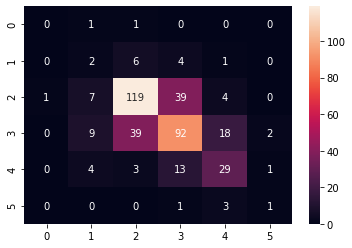

In [24]:
#import seaborn as sns
#from sklearn.metrics import confusion_matrix
#sns.heatmap(confusion_matrix(y_test_red, red_clf.predict(X_test_red)), annot = True, fmt="d")

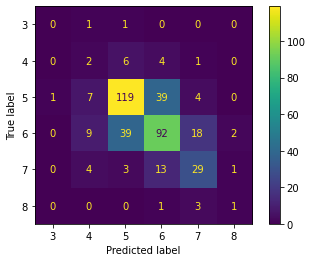

In [25]:
# Red Wine
predictions = red_clf.predict(X_test_red)
cm = confusion_matrix(y_test_red, predictions, labels=red_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=red_clf.classes_)
disp.plot()

plt.show()

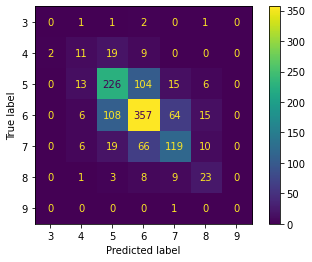

In [27]:
# White wine
predictions = white_clf.predict(X_test_white)
cm = confusion_matrix(y_test_white, predictions, labels=white_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=white_clf.classes_)
disp.plot()

plt.show()
